In [210]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "titanic"

In [211]:
suppressMessages(library('ggplot2'))
suppressMessages(library('dplyr'))
suppressMessages(library('caret'))


# **1. Data import & Data introduce**

In [212]:
train <- read.csv('/kaggle/input/titanic/train.csv', stringsAsFactors = F)
test  <- read.csv('/kaggle/input/titanic/test.csv', stringsAsFactors = F)

# 1-1. Data structure

In [213]:
str(train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


Train have 12 variables and 891 observations


In [214]:
str(test)

'data.frame':	418 obs. of  11 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr  "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr  "male" "female" "male" "male" ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr  "330911" "363272" "240276" "315154" ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr  "" "" "" "" ...
 $ Embarked   : chr  "Q" "S" "Q" "S" ...


Test have 11 variables and 418 observations.

In [215]:
summary(train)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [216]:
summary(test)

  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
                                                                       
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :30.27   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max

# 1-2. Data processing

**Remove missing values.** \
Preprocessing for logistic regression is described later

In [217]:
train <- na.omit(train)

In [219]:
str(train)

'data.frame':	714 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 7 8 9 10 11 ...
 $ Survived   : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 2 2 2 ...
 $ Pclass     : int  3 1 3 1 3 1 3 3 2 3 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 54 2 27 14 4 ...
 $ SibSp      : int  1 1 0 1 0 0 3 0 1 1 ...
 $ Parch      : int  0 0 0 0 0 0 1 2 0 1 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
 - attr(*, "na.action")= 'omit' Named int [1:177] 6 18 20 27 29 30 32 33 37 43 ...
  ..- attr(*, "names")= chr [1:177] "6" "18" "20" "27" ...


**Preprocessing for logistic regression is described later**

# 1-3. Data visualizing

# The relationship of variables
The relationship between survived variables and other variables was analyzed after visualization.

**Age & Survived**

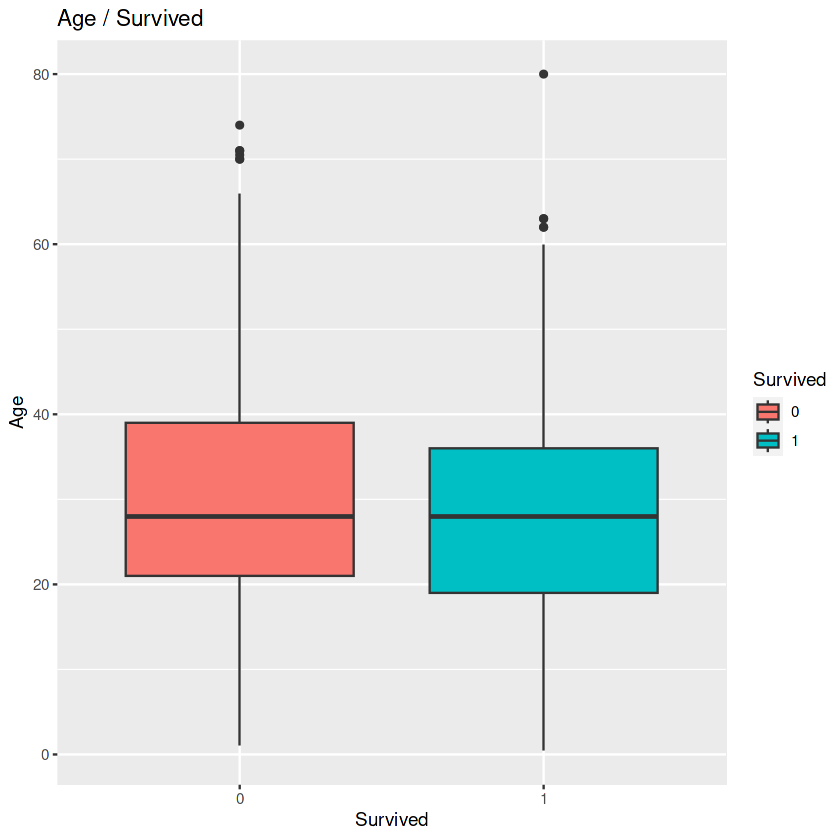

In [220]:
ggplot(train, aes(x= Survived, y = Age , fill = Survived)) +
  geom_boxplot() +  
  xlab("Survived") +
  ggtitle("Age / Survived")

In the data, Age is independent of Survived \
Because, Ratio is similar

**Sex & Survived**

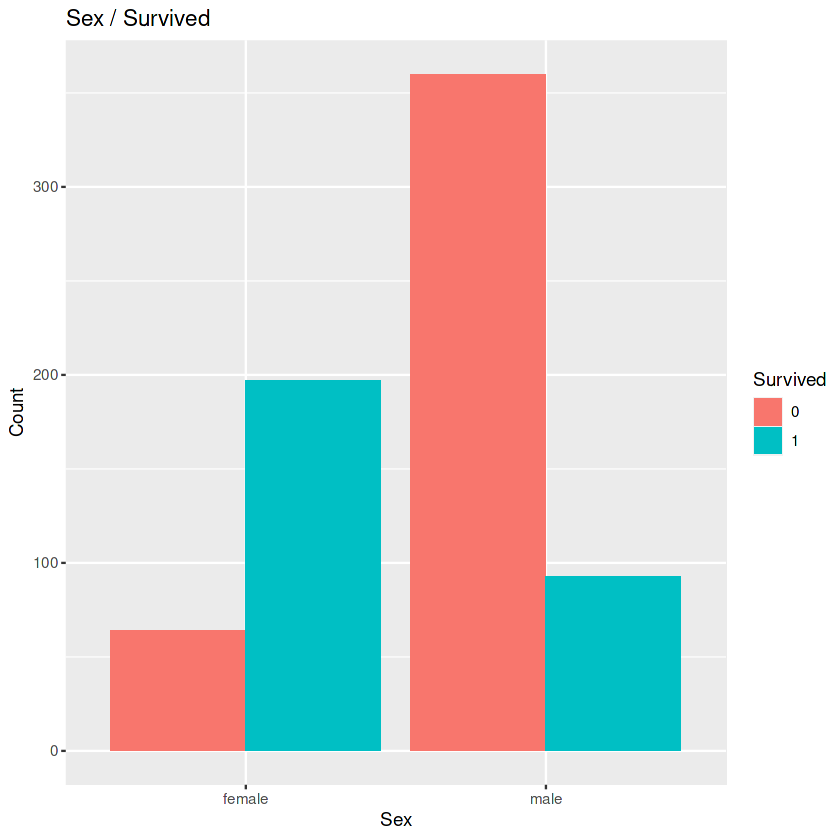

In [221]:
ggplot(train , aes(x= Sex, fill = Survived)) + 
  geom_bar(position = 'dodge')+
  xlab("Sex") +
  ylab("Count") + 
  ggtitle("Sex / Survived")

In the data, Male have a lower survival rate than female. \
There seems to be a relationship between sex and survived.

**Pcalss & Survived**

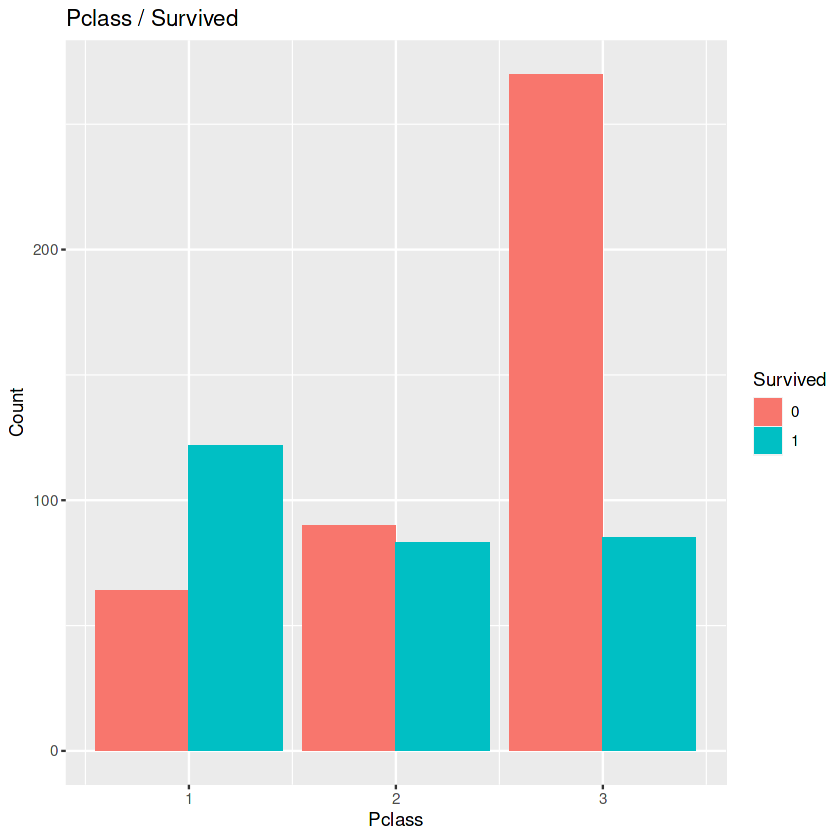

In [222]:
ggplot(train , aes(x= Pclass, fill = Survived)) + 
  geom_bar(position = 'dodge')+
  xlab("Pclass") +
  ylab("Count") + 
  ggtitle("Pclass / Survived")

In the data, many people with a P-class of 3 died.

The relationship between various variables was expressed at once.

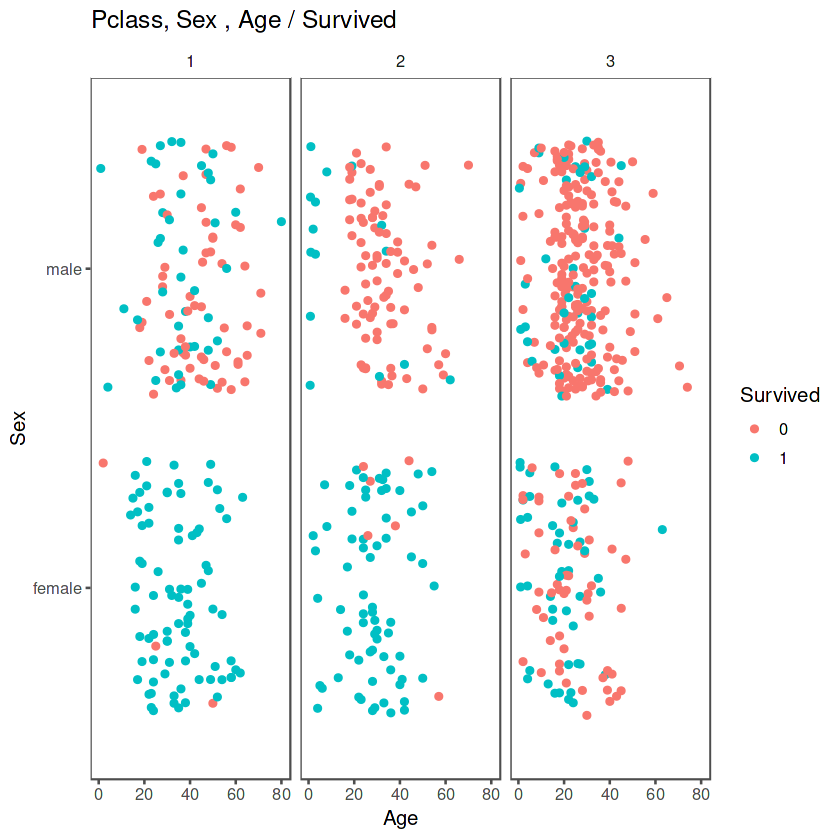

In [223]:
ggplot(train, aes(x = Age, y = Sex)) + 
  geom_jitter(aes(colour = Survived)) + 
  theme_few() +
  facet_wrap(~ Pclass) + 
  labs(x = "Age", y = "Sex", title = "Pclass, Sex , Age / Survived")

Looking at the graph, the Pclass is high and children and female often survive.

# **2. Modeling LogisticRegression**

# 2-1. Build the model

Building a Logistic Regression Model. 

**To use Logistic regression.** \
Logistic regression have dependent variable type is a factor and independent variable type is numerical.
Therefore, Data preprocessing is necessary if the types are different. \
And other variables are preprocessed.
Independent variables are age, gender and Pclass.

In [235]:
#Transformation for logistic regression

train$Survived <- as.factor(train$Survived)
train$Sex[train$Sex == "male"] <- 0
train$Sex[train$Sex == "female"] <- 1
train$Sex <- as.integer(train$Sex)

test$Sex[test$Sex == "male"] <- 0
test$Sex[test$Sex == "female"] <- 1
test$Sex <- as.integer(test$Sex)

In [231]:
md_glm <- glm(Survived ~ Sex + Age + Pclass, data = train, family = 'binomial')

# 2-2. Model analysis

In [232]:
summary(md_glm)


Call:
glm(formula = Survived ~ Sex + Age + Pclass, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7270  -0.6799  -0.3947   0.6483   2.4668  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.533875   0.456247   5.554 2.80e-08 ***
Sex          2.522131   0.207283  12.168  < 2e-16 ***
Age         -0.036929   0.007628  -4.841 1.29e-06 ***
Pclass      -1.288545   0.139259  -9.253  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 647.29  on 710  degrees of freedom
AIC: 655.29

Number of Fisher Scoring iterations: 5


The p-values of all variables are less than the significance level, so they are statistically significant. \
The regression equation for this model is 5.056006 + Sex * -2.522131 + Age * 0.0.6929 + Pclass * -1.288545 \
The smaller the AIC, the better the logistic regression model.

In [233]:
step(md_glm,direction = "backward" ) #Backward 

Start:  AIC=655.29
Survived ~ Sex + Age + Pclass

         Df Deviance    AIC
<none>        647.29 655.29
- Age     1   672.51 678.51
- Pclass  1   749.96 755.96
- Sex     1   827.43 833.43



Call:  glm(formula = Survived ~ Sex + Age + Pclass, family = "binomial", 
    data = train)

Coefficients:
(Intercept)          Sex          Age       Pclass  
    2.53388      2.52213     -0.03693     -1.28855  

Degrees of Freedom: 713 Total (i.e. Null);  710 Residual
Null Deviance:	    964.5 
Residual Deviance: 647.3 	AIC: 655.3

It is the most important variable because the AIC value of the sex variable is the largest.

**Predictions using models**

In [227]:
pred <- round(predict(md_glm,test,type = "response")) # type = "response": prediction results are 0 and 1

In [228]:
head(pred)

1 2 3 4 5 6 
0 0 0 0 1 0

# 2-3. Example of using a model

In [248]:
f <- data.frame(Sex = c("male"), Age = c(15),Pclass = c(2))

In [252]:
f$Sex[f$Sex == "male"] <- 0
f$Sex <- as.integer(f$Sex)

In [254]:
round(predict(md_glm,f,type="response"))

1 
0

# This model predicts that f is dead